 ## Customer Churn Prediction Using Decision Tree and Random Forest

In [95]:
##Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
## Load Dataset

In [6]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [97]:
## Data Preprocessing

In [8]:
df.dropna(inplace=True)
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

In [9]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85          2505      0  
1                    0              3           56.95          1466      0  
2                    1              3           53.85           157      1  
3                    0              0           42.30          1400      0  
4                    1              2           70.70           925      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80          1597      0  
7039                 1              1          103.20          5698      0  
7040                 1              2           29.60          2994      0  
7041                 1              3           74.40          2660      1  
7042                 1              0          105.65          5407      0  

[7043 rows x 21 columns]

In [99]:
## Feature Selection

In [11]:
x = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [101]:
## Train-Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
##  Decision Tree Model

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)

In [105]:
## Random Forest Model

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

In [107]:
## Evaluation

In [19]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.7203690560681334
[[849 187]
 [207 166]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1036
           1       0.47      0.45      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.63      0.63      1409
weighted avg       0.72      0.72      0.72      1409



In [20]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.7934705464868701
[[944  92]
 [199 174]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [109]:
## Visualization (Optional)

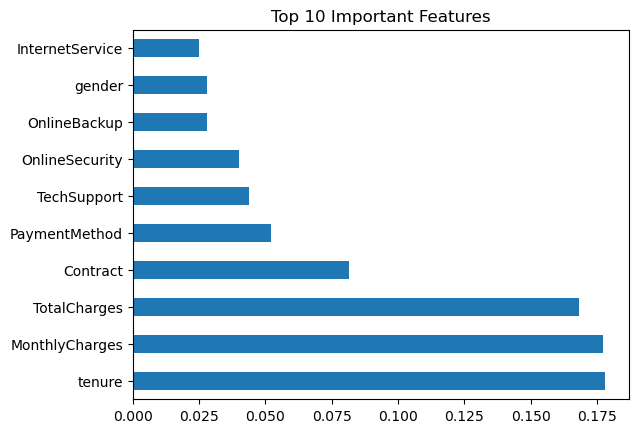

In [22]:
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
# Confusion matrix for Decision Tree

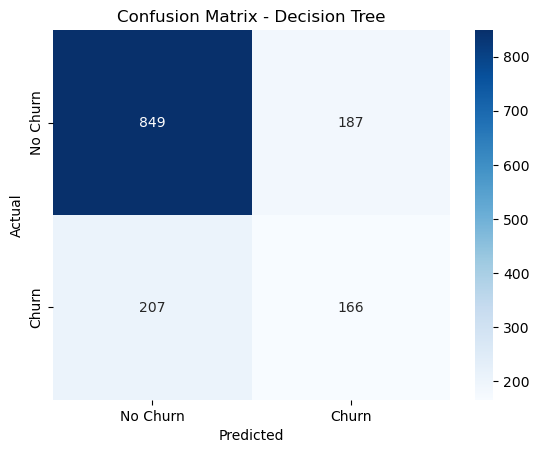

In [25]:
cm_dt = confusion_matrix(y_test, dt_preds)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Confusion matrix for Random Forest

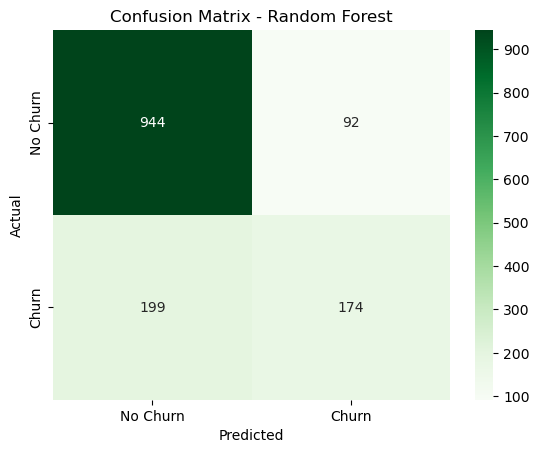

In [27]:
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
!pip install graphviz

In [29]:
from sklearn import tree
import graphviz

In [30]:
# Export the decision tree

In [31]:
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=x.columns,  
                                class_names=["No Churn", "Churn"],
                                filled=True, rounded=True,  
                                special_characters=True)

In [32]:
# Visualize using graphviz

In [33]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as PDF
graph  # This will render directly in Jupyter Notebook

In [34]:
# Visualize one tree from the random forest

In [35]:
estimator = rf_model.estimators_[0]

dot_data = tree.export_graphviz(estimator, out_file=None,
                                feature_names=x.columns,
                                class_names=["No Churn", "Churn"],
                                filled=True, rounded=True,
                                special_characters=True)

In [36]:
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree_0")  # Saves as PDF
graph

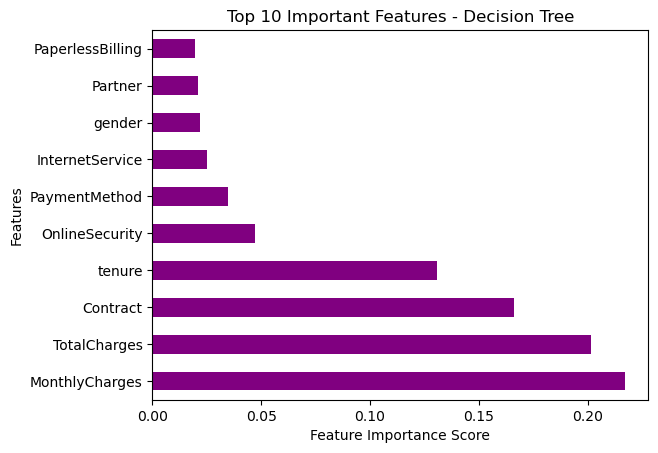

In [37]:
dt_feat_importances = pd.Series(dt_model.feature_importances_, index=x.columns)
dt_feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

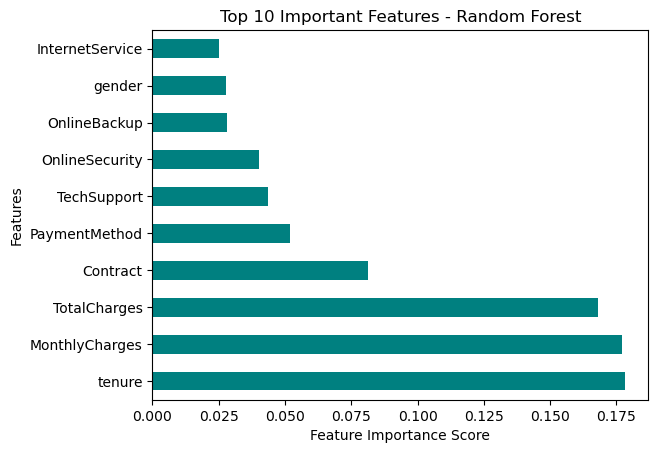

In [38]:
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

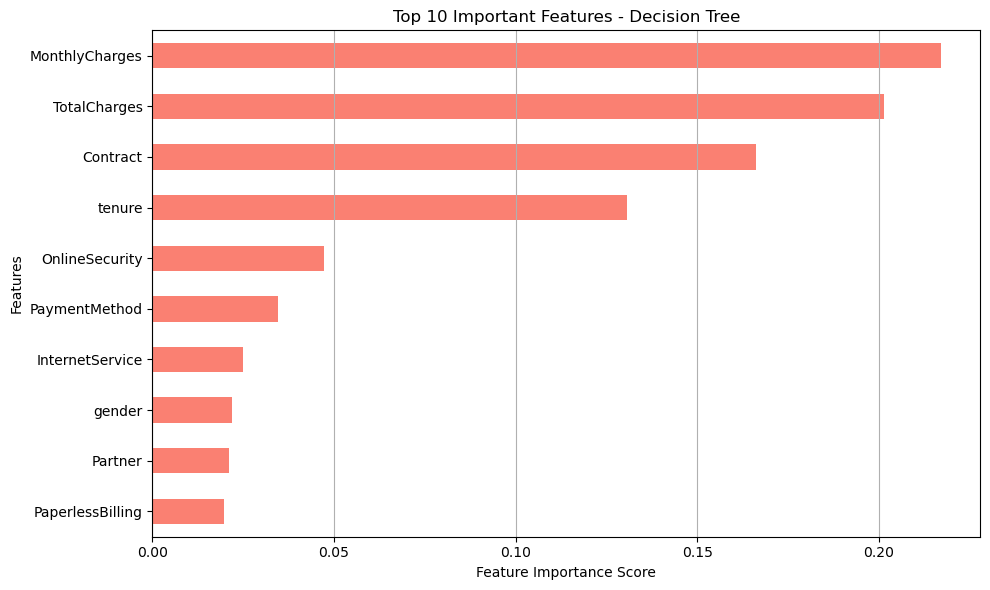

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=x.columns)
top_dt_features = dt_feature_importances.nlargest(10)
plt.figure(figsize=(10, 6))
top_dt_features.plot(kind='barh', color='salmon')
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

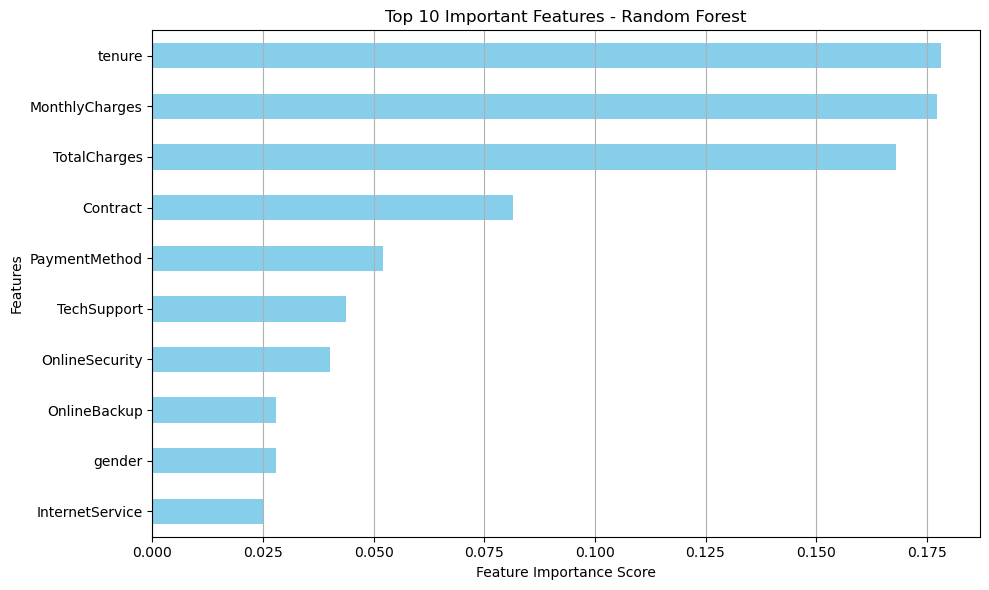

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
top_features = feature_importances.nlargest(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\chars\AppData\Local\Temp\ipykernel_9628\2372482981.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='Blues_d')


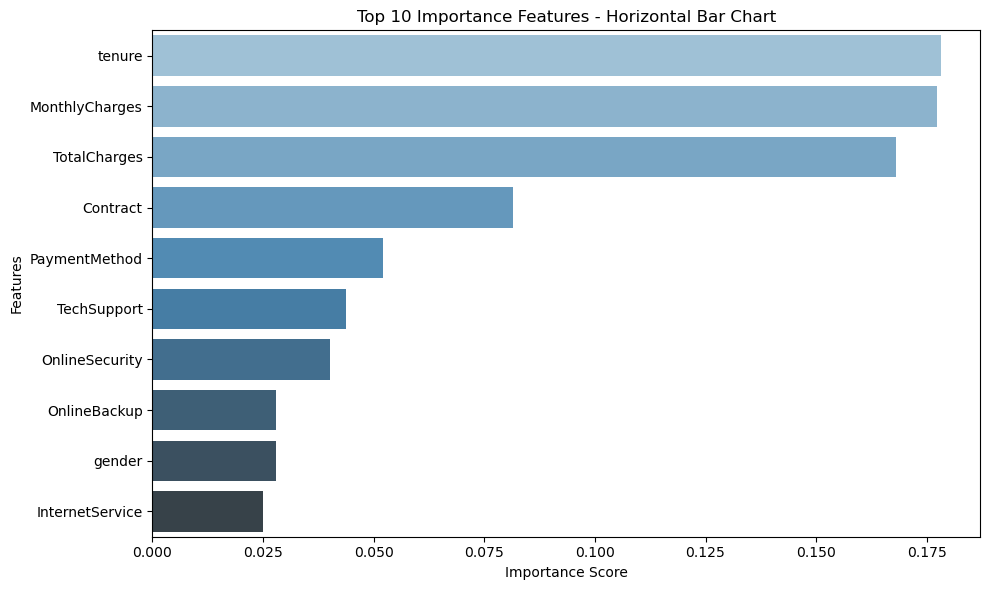

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='Blues_d')
plt.title("Top 10 Importance Features - Horizontal Bar Chart")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\chars\AppData\Local\Temp\ipykernel_9628\2207166173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='coolwarm')


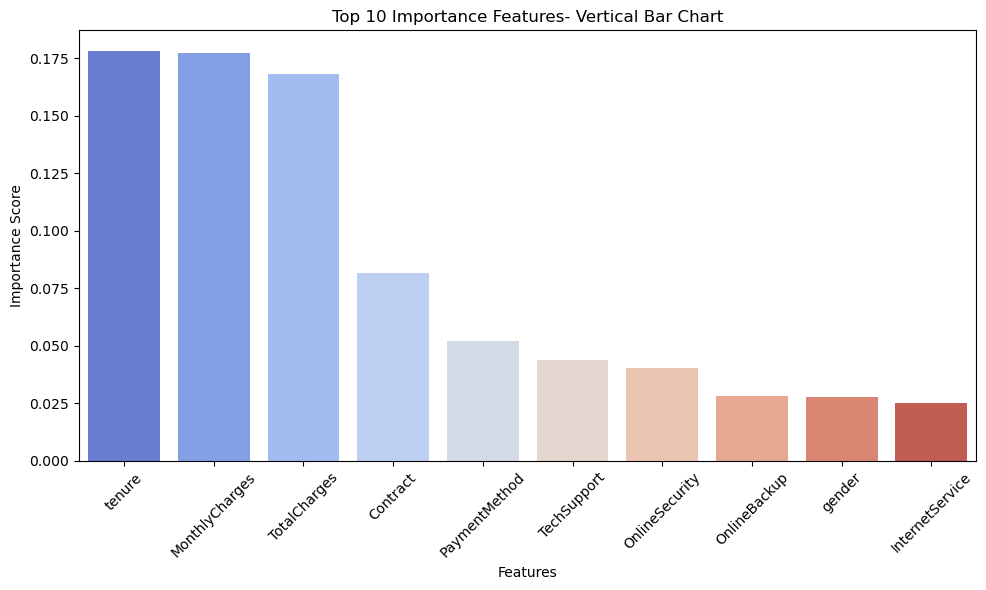

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='coolwarm')
plt.title("Top 10 Importance Features- Vertical Bar Chart")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

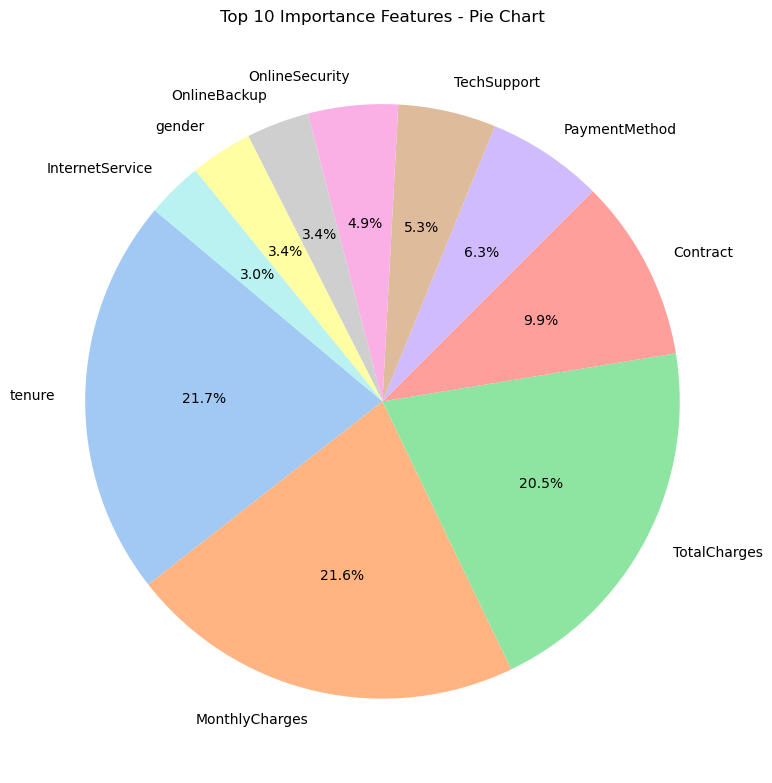

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(feature_importance.values, labels=feature_importance.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 10 Importance Features - Pie Chart")
plt.tight_layout()
plt.show()

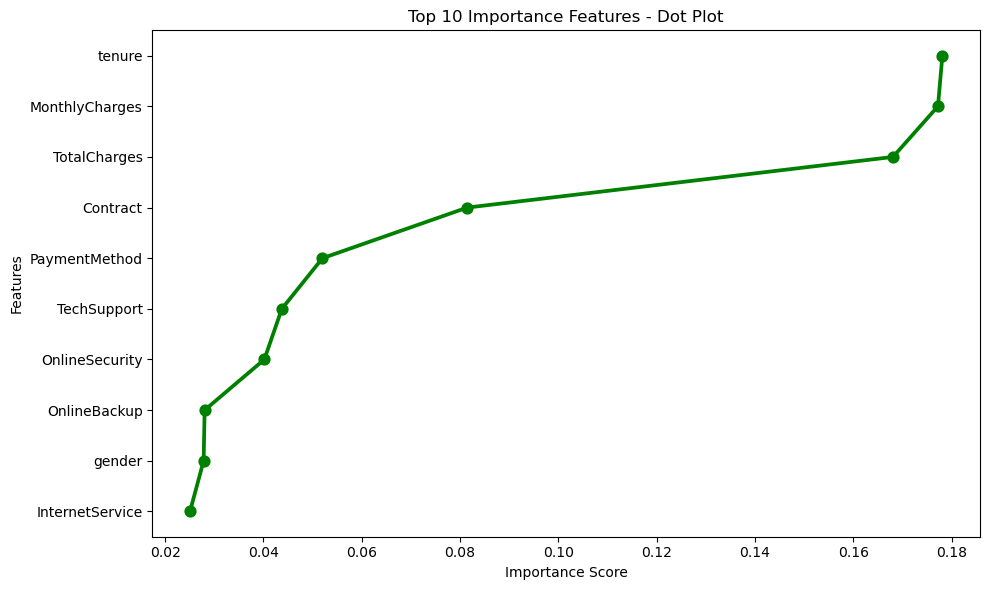

In [44]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=feature_importance.values, y=feature_importance.index, color='green')
plt.title("Top 10 Importance Features - Dot Plot")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

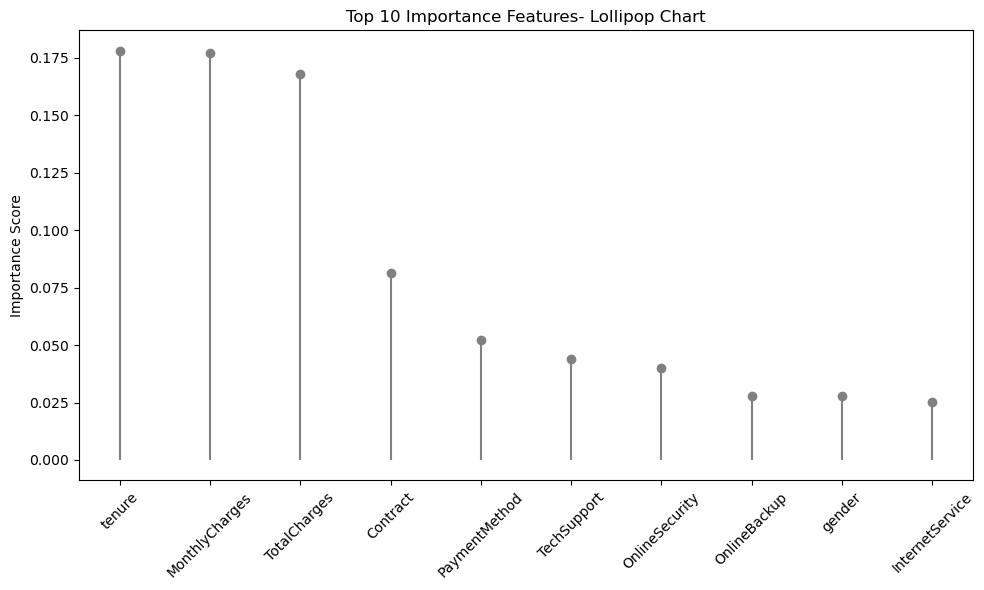

In [45]:
plt.figure(figsize=(10, 6))
plt.stem(feature_importance.values, linefmt='grey', markerfmt='o', basefmt=" ")
plt.xticks(ticks=range(len(feature_importance)), labels=feature_importance.index, rotation=45)
plt.title("Top 10 Importance Features- Lollipop Chart")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

C:\Users\chars\AppData\Local\Temp\ipykernel_9628\3358085624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dt_features.values, y=top_dt_features.index, palette='Oranges_r')
C:\Users\chars\AppData\Local\Temp\ipykernel_9628\3358085624.py:23: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\chars\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


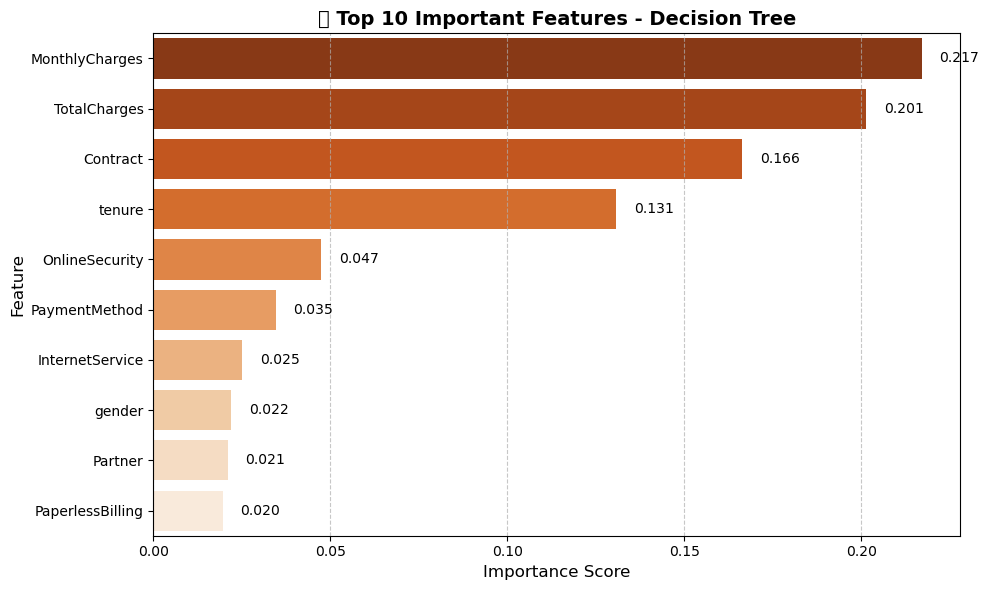

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance series
dt_feat_importances = pd.Series(dt_model.feature_importances_, index=x.columns)
top_dt_features = dt_feat_importances.nlargest(10)

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dt_features.values, y=top_dt_features.index, palette='Oranges_r')

# Add title and labels
plt.title("🔍 Top 10 Important Features - Decision Tree", fontsize=14, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Add value labels to bars
for i, v in enumerate(top_dt_features.values):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)

# Grid and layout tweaks
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
